# Neural networks

Artificial neural networks are computational systems that can learn to perform tasks by considering examples,
generally without being programmed with any task-specific rules. It is supposed to mimic a biological system, wherein neurons interact by sending signals in the form of mathematical functions between layers. All layers can contain an arbitrary number of neurons, and each connection is represented by a weight variable.  
  
In this tutorial we will build a feed-forward neural network, where information moves in only in direction:
forward through the layers. Each neuron or *node* is represented by a circle, while arrows display the connections
between the nodes and indicate the direction of information flow. Each node in a layer is connected to all nodes in the subsequent layer, which makes this a so-called *fully-connected* feed-forward neural network.

![FFNN](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)  
Via [Wikipedia](https://en.wikipedia.org/wiki/File:Colored_neural_network.svg)

# Prerequisites

To follow this tutorial we require an installation of Python with the numerical package **numpy**, either:  
1) Python 2.7.x  
2) Python 3.5.x or greater  
  
With a version of Numpy 1.0.x or greater.  
We will also use the packages **matplotlib**, **scikit-learn**, **Tensorflow** and **Keras**, though these are not strictly necessary.  
To open and run this notebook you also need an installation of **IPython** and **Jupyter Notebook**.  
  
# Anaconda
Anaconda is a free and open source Python and R distribution, that aims to simplify package management and deployment. Anaconda comes with more than 1000 data packages, as well as the Conda package and package and virtual environment manager. Anaconda is available on Linux, OS X and Windows systems, and contains nearly all prerequisite software, and comes highly recommended.  
If Anaconda is installed you can install Tensorflow and Keras using:  
  
```conda install tensorflow```  
```conda install keras```  
  
(You may run into minor problems with conflicting package versions)  
  
# Pip package manager
If you do not wish to install Anaconda you may download Python from [here](https://www.python.org/downloads/),
or you can use package managers like **brew**, **apt**, **pacman**,...  
Python distributions come with their own package manager, **pip**, and once you have Python installed
you can run the following command:  
  
```pip install numpy matplotlib scikit-learn ipython jupyter```  
  
To install Tensorflow follow the instructions [here](https://www.tensorflow.org/install/).  
After you have installed tensorflow you can install keras:  
  
```pip install keras```

![Python](https://imgs.xkcd.com/comics/python_environment.png)  
Via [xkcd](https://xkcd.com/1987/)

# Workflow
  
One can identify a set of key steps when using neural networks to solve supervised learning problems:  
  
**
1) Collect and pre-process data  
2) Define model and architecture  
3) Choose cost function and optimizer  
4) Train the model  
5) Evaluate model performance on test data  
6) Adjust hyperparameters (if necessary, network architecture)
**

# 1) Collect and pre-process data
  
In this tutorial we will be using the MNIST dataset, which is readily available through the **scikit-learn**
package. You may also find it for example [here](http://yann.lecun.com/exdb/mnist/).  
The **MNIST** (Modified National Institute of Standards and Technology) database is a large database
of handwritten digits that is commonly used for training various image processing systems.  
The MNIST dataset consists of 70 000 images of size 28x28 pixels, each labeled from 0 to 9.  
  
To feed data into a feed-forward neural network we need to represent the inputs as a feature matrix $X = [n_{inputs}, 
n_{features}]$.  
Each row represents an **input**, in this case a handwritten digit, and each column represents a **feature**, in this case a pixel.  
The correct answers, also known as **labels** or **targets** are represented as a 1D array of integers $Y = [5, 3, 1, 8,...]$.  
  
Say I wanted to build a neural network using supervised learning to predict Body-Mass Index (BMI) from
measurements of height (in m)  
and weight (in kg). If I had measurements of 5 people the feature matrix could be for example:  
  
$$ X = \begin{bmatrix}
1.85 & 81\\
1.71 & 65\\
1.95 & 103\\
1.55 & 42\\
1.63 & 56
\end{bmatrix} ,$$  
  
and the targets would be:  
  
$$ Y = (23.7, 22.2, 27.1, 17.5, 21.1) $$  
  
Since each input image is a 2D matrix, we need to flatten the image (i.e. "unravel" the 2D matrix into a 1D array)  
to turn the data into a feature matrix. This means we lose all spatial information in the image, such as locality and translational invariance ([explanation](https://stats.stackexchange.com/questions/208936/what-is-translation-invariance-in-computer-vision-and-convolutional-neural-netwo))  
More complicated architectures such as Convolutional Neural Networks can take advantage
of such information, and is most commonly applied when analyzing images.

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


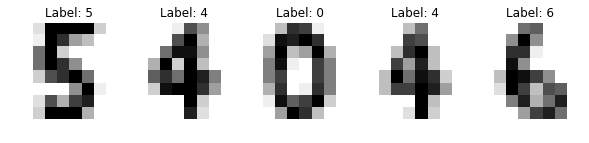

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


# Train and test datasets

Performing analysis before partitioning the dataset is a major error, that can lead to incorrect conclusions  
(see "Bias-Variance Tradeoff", for example [here](https://ml.berkeley.edu/blog/2017/07/13/tutorial-4/)).  
  
We will reserve $80 \%$ of our dataset for training and $20 \%$ for testing.  
  
It is important that the train and test datasets are drawn randomly from our dataset, to ensure
no bias in the sampling.  
Say you are taking measurements of weather data to predict the weather in the coming 5 days.
You don't want to train your model on measurements taken from the hours 00.00 to 12.00, and then test it on data
collected from 12.00 to 24.00.

In [8]:
from sklearn.model_selection import train_test_split

# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

# equivalently in numpy
def train_test_split_numpy(inputs, labels, train_size, test_size):
    n_inputs = len(inputs)
    inputs_shuffled = inputs.copy()
    labels_shuffled = labels.copy()
    
    np.random.shuffle(inputs_shuffled)
    np.random.shuffle(labels_shuffled)
    
    train_end = int(n_inputs*(1-test_size))
    X_train, X_test = inputs_shuffled[:train_end], inputs_shuffled[train_end:]
    Y_train, Y_test = labels_shuffled[:train_end], labels_shuffled[train_end:]
    
    return X_train, X_test, Y_train, Y_test

#X_train, X_test, Y_train, Y_test = train_test_split_numpy(inputs, labels, train_size, test_size)

# 2) Define model and architecture
  
Our simple feed-forward neural network will consist of an **input** layer, a single **hidden** layer and an **output** layer. The activation $y$ of each neuron is a weighted sum of inputs, passed through an activation function:  
  
$$ z = \sum_{i=1}^n w_i x_i ,$$
  
$$ y = f(z) ,$$
  
where $f$ is the activation function, $x_i$ represents input from neuron $i$ in the preceding layer
and $w_i$ is the weight to neuron $i$.  
The activation of the neurons in the input layer is just the features (e.g. a pixel value).  
  
The simplest activation function for a binary classifier (e.g. two classes, 0 or 1, cat or not cat)
is the **Heaviside** function:
  
$$ f(z) = 
\begin{cases}
1,  &  z > 0\\
0,  & \text{otherwise}
\end{cases}
$$
  
A feed-forward neural network with this activation is known as a **perceptron**.  
This activation can be generalized to $k$ classes (using e.g. the *one-against-all* strategy), 
and we call these architectures **multiclass perceptrons**.  
  
However, it is now common to use the terms Single Layer Perceptron (SLP) (1 hidden layer) and  
Multilayer Perceptron (MLP) (2 or more hidden layers) to refer to feed-forward neural networks with any activation function.

**Input**: Since each input image has 8x8 = 64 pixels or features, we have an input layer of 64 neurons.  
**Hidden layer**: We will use 25 neurons in the hidden layer receiving input from the neurons in the input layer.
Since each neuron is connected to the 64 inputs we have 64x25 = 1600 weights to the hidden layer.  
**Output**: 